In [2]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

import matplotlib.pyplot as plt
import sys
import os
import tripyview as tpv
import numpy as np 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

/tmp/ipykernel_32043/3799545025.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib notebook')
/tmp/ipykernel_32043/3799545025.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('load_ext autoreload')
/tmp/ipykernel_32043/3799545025.py:3: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('autoreload 2')
/home/pscholz/Software/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/core/options.py:115: FutureWarning: The enable_cftimeindex option is now a no-op and will be removed in a future version of xarray.
  warnings.warn(


/home/pscholz/Python/tripyview


/home/pscholz/Software/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/core/options.py:115: FutureWarning: The enable_cftimeindex option is now a no-op and will be removed in a future version of xarray.
  warnings.warn(


In [3]:
#_______________________________________________________________________________
dname = '/home/pscholz/AWI/AWI_MATLAB/MONICA_scipts/plot_climatestribes/' 
fname = 'ger-att.prn' 
sel_yr    = [1881, 2018]  
sel_refyr = [1971, 2000]
which_mean  = 'year'  # 'month', 'year'

cmin   =-1.5;
cmax   = 1.5;
cref   = 0;
cnum   = 15;
cstr   = 'blue2red'
# cstr   = 'cmocean.balance'
# cstr   = 'cmocean.delta'

In [4]:
# load data
data = np.loadtxt(os.path.join(dname,fname))
year    = data[:, 0   ];
data_mm = data[:, 0:12];
data_ym = data[:, -1  ];

# select years 
idx_selyr = (year>=sel_yr[0]) & (year<=sel_yr[1]) 
year = year[idx_selyr]
data_mm = data_mm[idx_selyr,:]
data_ym = data_ym[idx_selyr]
nyr     = len(year)

# compute anomalies
if (which_mean=='year'):
    nmon=1
    idx_selyr = (year>=sel_refyr[0]) & (year<=sel_refyr[1]) 
    data_anom = data_ym - np.sum(data_ym[idx_selyr])/np.sum(idx_selyr)
    data_anom = data_anom[np.newaxis,:]
    print(data_anom.shape)
    time      = year 
    nt        = len(time)
    
elif (which_mean=='month'):
    nmon = 12
    time_yr   = year[:, np.newaxis] * np.ones((1,nmon))
    time_yr   = time_yr.flatten()
    time_mon  = np.ones((nyr,1)) + np.arange(0,nmon,1)
    time_mon  = time_mon.flatten()
    time      = time_yr + (time_mon-1)/nmon
    nt        = len(time)
    
    idx_selyr = (year>=sel_refyr[0]) & (year<=sel_refyr[1]) 
    data_clim = np.sum(data_mm[idx_selyr,:], axis=0)/np.sum(idx_selyr)
    data_clim = np.ones((nyr,1))*data_clim[np.newaxis,:]
    data_clim = data_clim.flatten()
    data_anom = data_mm.flatten() - data_clim
    data_anom = data_anom[np.newaxis,:]
# load cmap
cmap, clevel, cref = tpv.colormap_c2c(cmin, cmax, cref, cnum, cstr)

(1, 138)


<IPython.core.display.Javascript object>


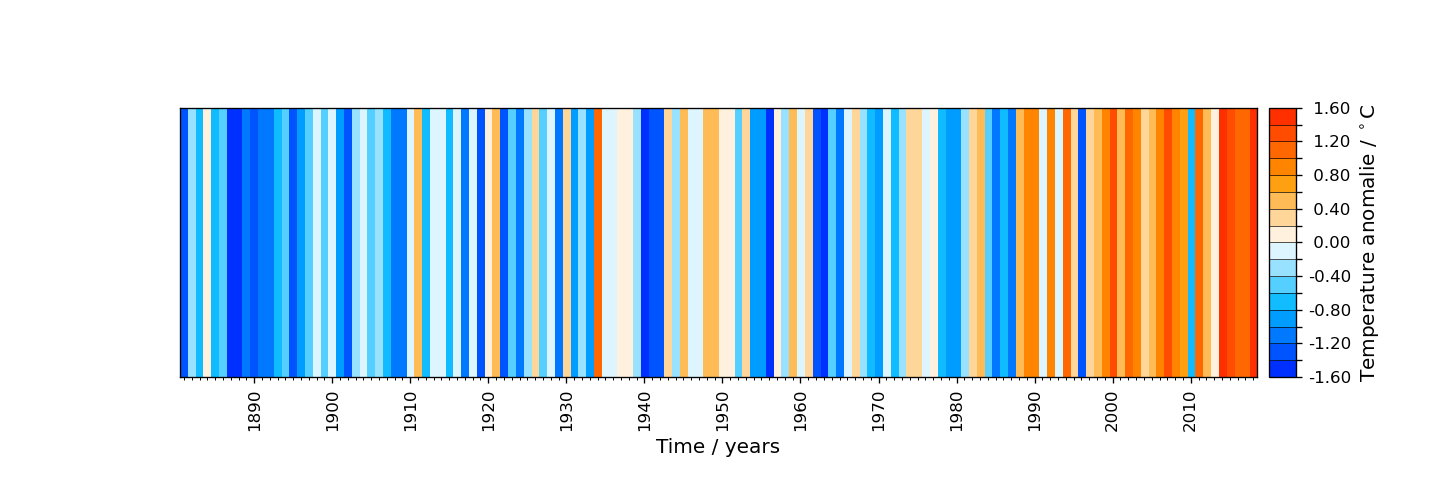

 > save figure: ./anomaly_stribe_ym.png


In [5]:
fig, ax1 = plt.subplots(figsize=[12,4])

# do stribe plot
ratio_wh = 4
extent = time[0]-0.5/nmon, time[-1]+0.5/nmon, 0, (time[-1]-time[0]+1/nmon)/ratio_wh
hi = ax1.imshow(data_anom, cmap=cmap, extent=extent, vmin=clevel[0], vmax=clevel[-1], interpolation="none")

# add and arrange colorbar
divider = make_axes_locatable(ax1)
cax     = divider.append_axes("right", size="2.5%", pad=0.1)
cbar    = plt.colorbar(hi, ax=ax1, cax=cax, orientation='vertical', ticks=clevel, 
                    extendrect=False, extendfrac=None, drawedges=True,)  

# arange colorbar labels
cfac=2
idcref = np.where(clevel==cref)[0][0]
cblkeep = np.sort(np.unique(np.hstack((clevel[range(idcref,0-1,-cfac)], clevel[range(idcref,len(clevel),cfac)] )) ))
if cbar.orientation=='vertical': tickl = cbar.ax.get_yticklabels()
else:                            tickl = cbar.ax.get_xticklabels()
for ii in range(0,len(clevel)): 
    if clevel[ii] in cblkeep: 
        if (clevel[ii]>=0): tickl[ii] = ' {:2.2f}'.format(clevel[ii])
        else              : tickl[ii] = '{:2.2f}'.format(clevel[ii])
if cbar.orientation=='vertical': cbar.ax.set_yticklabels(tickl)
else:                            cbar.ax.set_xticklabels(tickl)
cbar.set_label('Temperature anomalie / $^\circ$C', size=12)    
    
# arange axes labels        
ax1.set_xlabel('Time / years',fontsize=12)
ax1.set_yticks([])
xmajor_locator = MultipleLocator(base=10) # this locator puts ticks at regular intervals
xminor_locator = MultipleLocator(base=1) #AutoMinorLocator(1)
ax1.xaxis.set_major_locator(xmajor_locator)
ax1.xaxis.set_minor_locator(xminor_locator)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
plt.show()

# save figure
sdname = './'
sfname = 'anomaly_stribe'
if   (which_mean=='year' ): sfname = sfname+'_ym'
elif (which_mean=='month'): sfname = sfname+'_mm'
sfname = sfname+'.png'    
tpv.do_savefigure(os.path.join(sdname,sfname), fig, dpi=600)